In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# text/file processing libraries
import string
import re
import sys
from nltk.corpus import stopwords
#from wordcloud import STOPWORDS
from itertools import chain
# warnings
import warnings
import statsmodels as sm
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
warnings.filterwarnings('ignore')
# set seed for reproducibility
np.random.seed(0)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_excel("E:/DQ/2021/dataset/client_bank.xlsx")
np.random.seed(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2000 non-null   int64  
 1   Months_Customer                 2000 non-null   int64  
 2   Number_Products                 2000 non-null   int64  
 3   RFM_Score                       693 non-null    float64
 4   Average_Balance_Feed_Index      695 non-null    float64
 5   Number_Transactions             2000 non-null   int64  
 6   Personal_Ratio                  2000 non-null   int64  
 7   Months_Current_Account          2000 non-null   int64  
 8   Number_Loan_Accounts            2000 non-null   int64  
 9   Customer_ID                     2000 non-null   int64  
 10  Has_Bad_Payment_Record          2000 non-null   int64  
 11  Members_Within_Household        2000 non-null   int64  
 12  Number_Contacts                 20

In [8]:
df.head(5)

,Age,Months_Customer,Number_Products,RFM_Score,Average_Balance_Feed_Index,Number_Transactions,Personal_Ratio,Months_Current_Account,Number_Loan_Accounts,Customer_ID,...,Homeowner,Accepted_Personal_Loan,Accepted_Retention,Accepted_Home_Equity_Loan,Annual_value,Interested_Personal_Loan,Interested_in_Retention,Interested_in_Home_Equity_Loan,Interested_in_Credit_Card,Accepted_Credit_Card
0,40,24,3,9.82899,229.0,2,40,13,0,5409,...,F,F,F,F,9.0,F,F,F,F,F
1,47,12,2,11.80799,8.0,1,47,5,2,5477,...,F,F,F,F,26.0,F,F,F,F,F
2,35,36,0,NaN,NaN,0,35,31,0,5507,...,T,F,F,T,NaN,F,F,T,F,T
3,45,0,0,NaN,NaN,0,45,-3,0,8,...,F,F,F,F,NaN,F,T,F,F,F
4,13,48,0,NaN,NaN,0,13,39,0,158,...,T,F,F,F,NaN,F,F,T,F,F


In [16]:
#preparation des donnees 
y = df.iloc[:,-1]
#X (les autres) sont les variables qui précèdent la dernière
X= df.iloc[:,:-1]

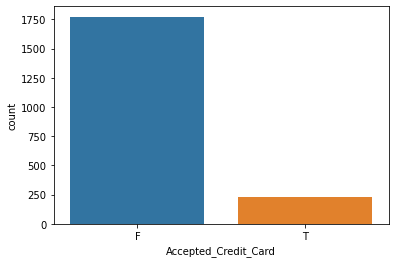

In [17]:
sb.countplot(x=y,data=X)

In [14]:
# Division de la bd
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
# Sur-échantillonnage
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(x_train, y_train)
x_rtest, y_rtest = rOs.fit_resample(x_test, y_test)
print(X_ro.shape)
print(x_rtest.shape)

(2462, 30)
(1082, 30)


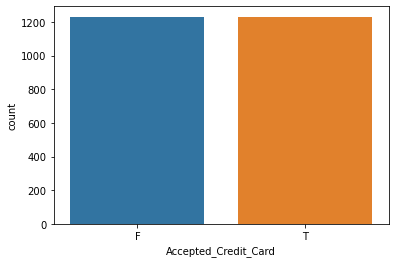

In [15]:
sb.countplot(x=y_ro,data=X_ro)

Text(0.5, 1.0, 'Scaled data')

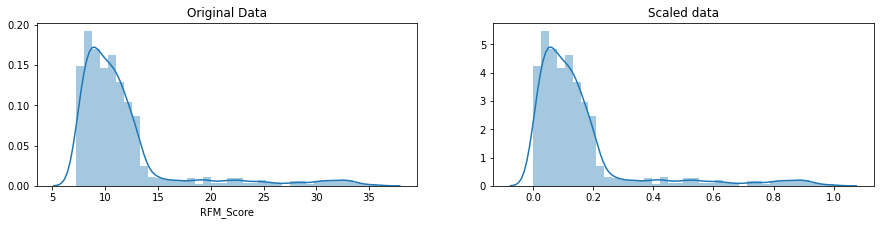

In [42]:
original_data = pd.DataFrame(df.RFM_Score)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['RFM_Score'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sb.distplot(df.RFM_Score, ax=ax[0])
ax[0].set_title("Original Data")
sb.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [43]:
print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    RFM_Score
0    9.82899
1   11.80799
2        NaN
3        NaN
4        NaN
Minimum value: 7.279 
Maximum value: 35.761555
______________________________

Scaled data
Preview:
    RFM_Score
0   0.089528
1   0.159009
2        NaN
3        NaN
4        NaN
Minimum value: 0.0 
Maximum value: 1.0


Text(0.5, 1.0, 'Normalized data')

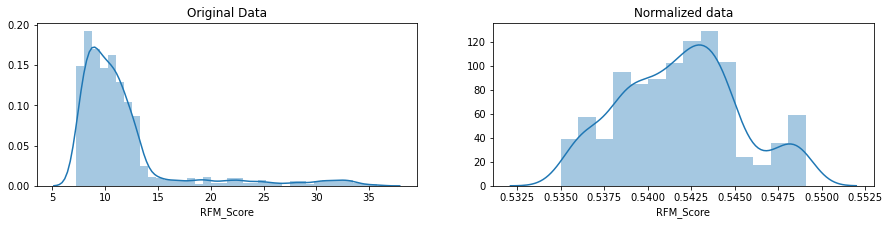

In [44]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = df.RFM_Score > 0

# get only positive pledges (using their indexes)
positive_pledges = df.RFM_Score.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='RFM_Score', index=positive_pledges.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sb.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sb.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

In [45]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 0     9.82899
1    11.80799
5    11.81900
8     7.87900
9     9.91999
Name: RFM_Score, dtype: float64
Minimum value: 7.279 
Maximum value: 35.761555
______________________________

Normalized data
Preview:
 0    0.541274
1    0.543718
5    0.543729
8    0.537008
9    0.541417
Name: RFM_Score, dtype: float64
Minimum value: 0.5350125221000186 
Maximum value: 0.5490683109891858
